# Analyse et Prédiction du Risque de Diabète

* Les installations :

* Les imports : 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from viz import visualization


* Importer dataset :

In [45]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  ...   BMI  DiabetesPedigreeFunction  Age
0             0            6      148  ...  33.6                     0.627   50
1             1            1       85  ...  26.6                     0.351   31
2             2            8      183  ...  23.3                     0.672   32
3             3            1       89  ...  28.1                     0.167   21
4             4            0      137  ...  43.1                     2.288   33
..          ...          ...      ...  ...   ...                       ...  ...
763         763           10      101  ...  32.9                     0.171   63
764         764            2      122  ...  36.8                     0.340   27
765         765            5      121  ...  26.2                     0.245   30
766         766            1      126  ...  30.1                     0.349   47
767         767            1       93  ...  30.4                     0.315   23

[768 rows x 9 columns]


## 🎯 Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

In [46]:
def knn_imputation(data):
    data_knn = data.copy()
    null_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
    
    for col in null_columns:
        data_knn[col] = data_knn[col].replace(0, np.nan)
        
    # Normalisation 
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_knn)
    data_scaled =pd.DataFrame(scaled_data, columns=data_knn.columns)
    
    # Imputation KNN
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(data_scaled)
    data_imputed = pd.DataFrame(imputed_data, columns=data_knn.columns)
    
    data_final_knn = pd.DataFrame(scaler.inverse_transform(data_imputed), columns=data_knn.columns)
    
    return data_final_knn

In [47]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [48]:
dataset_1 = knn_imputation(dataset)
print("******************** Après : is null : ****************************** \n", dataset_1.isnull().sum())
dataset_1.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.583594,72.289062,28.975260,154.781510,32.404375,0.471876,33.240885
std,221.846794,3.369578,30.497521,12.196650,9.446136,97.969796,6.896876,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,22.400000,88.950000,27.400000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.000000,134.100000,32.050000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


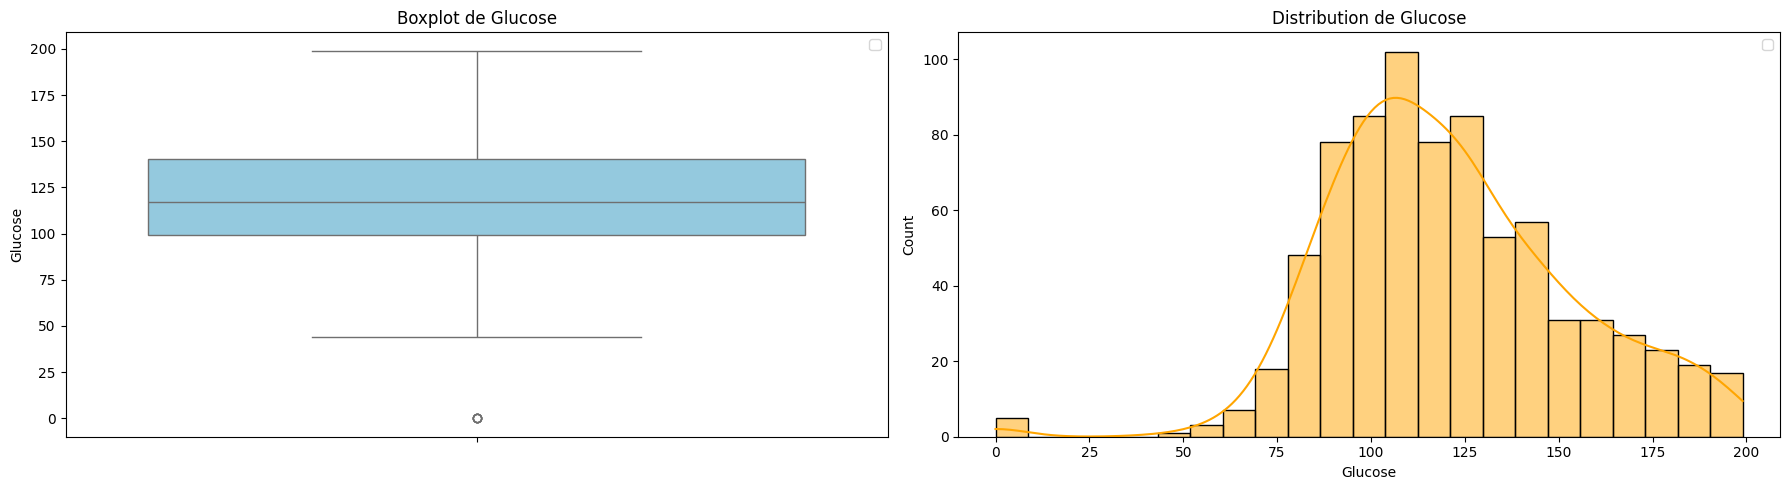

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


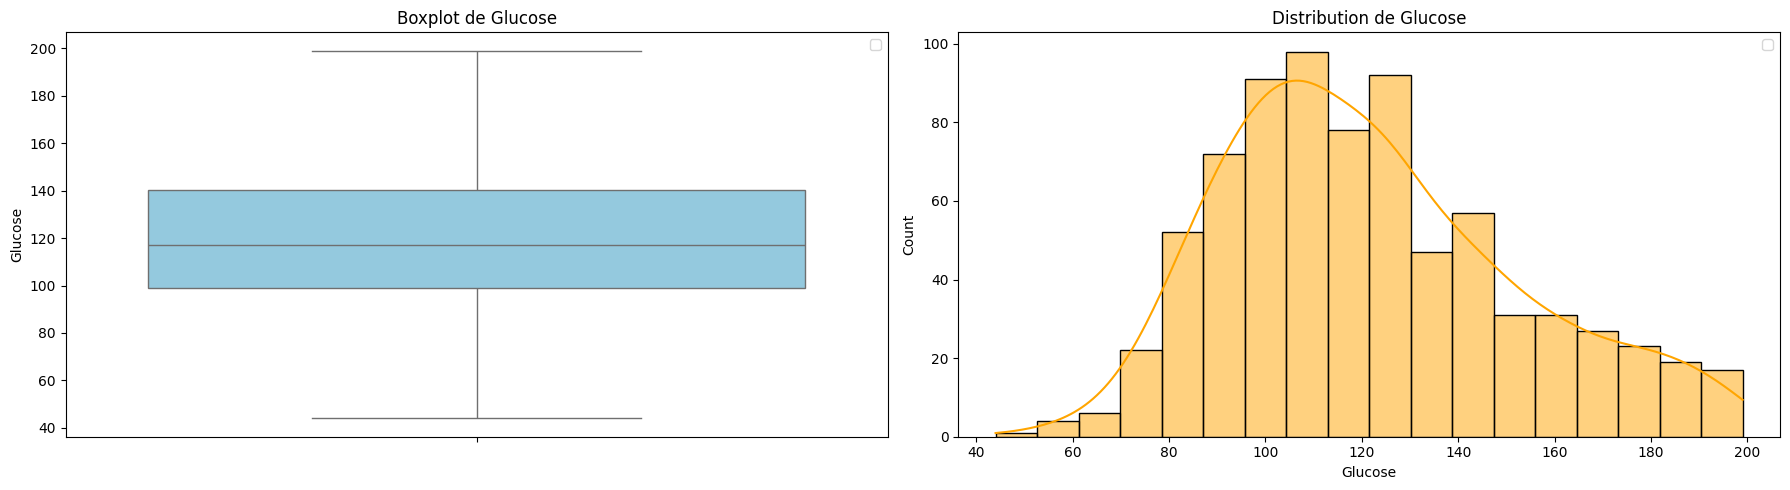

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


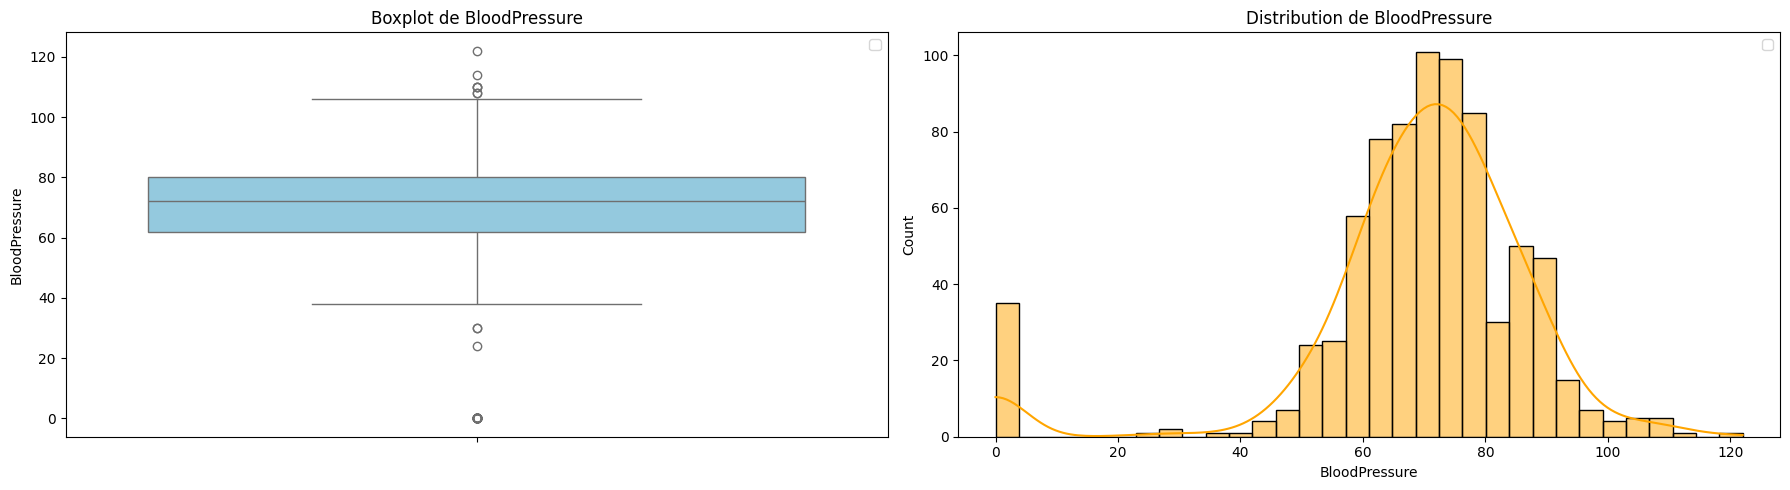

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


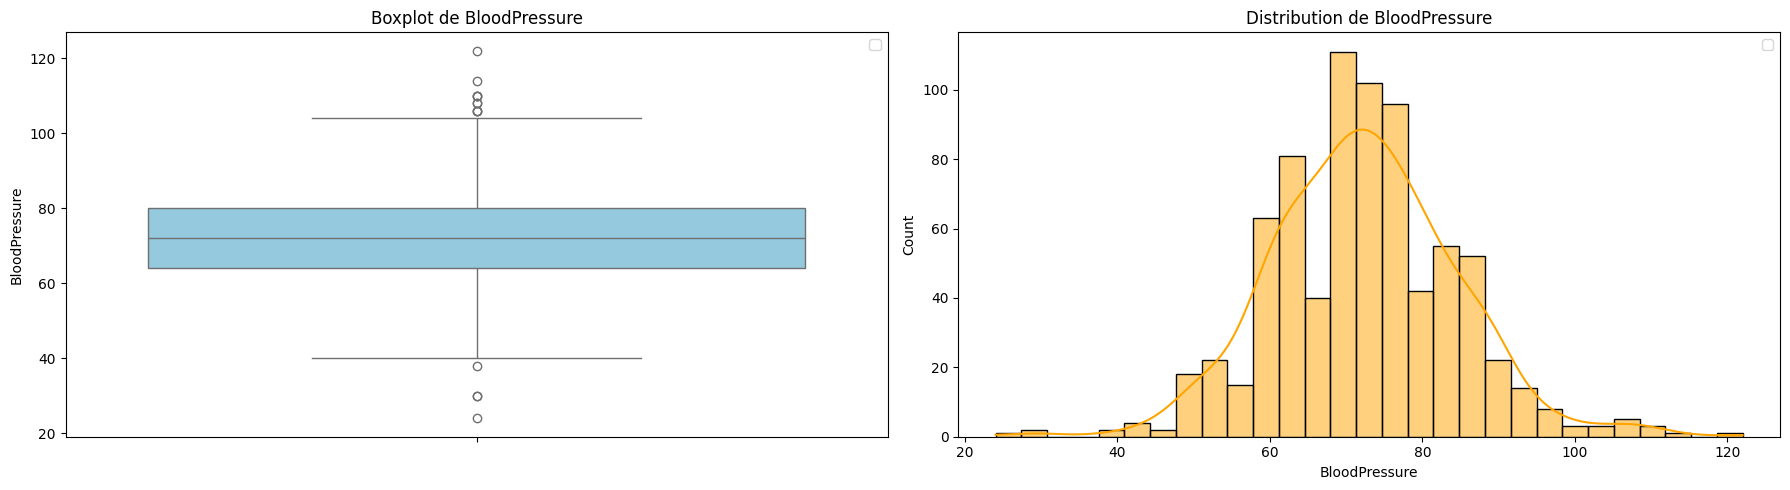

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


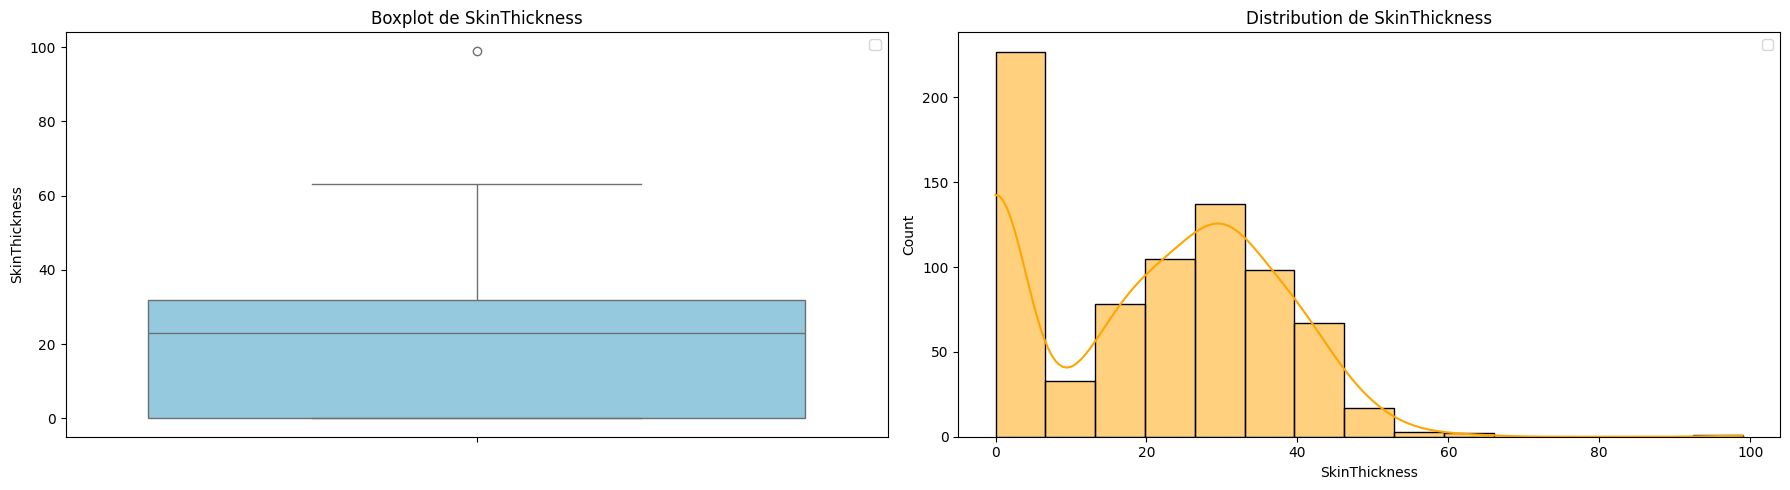

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


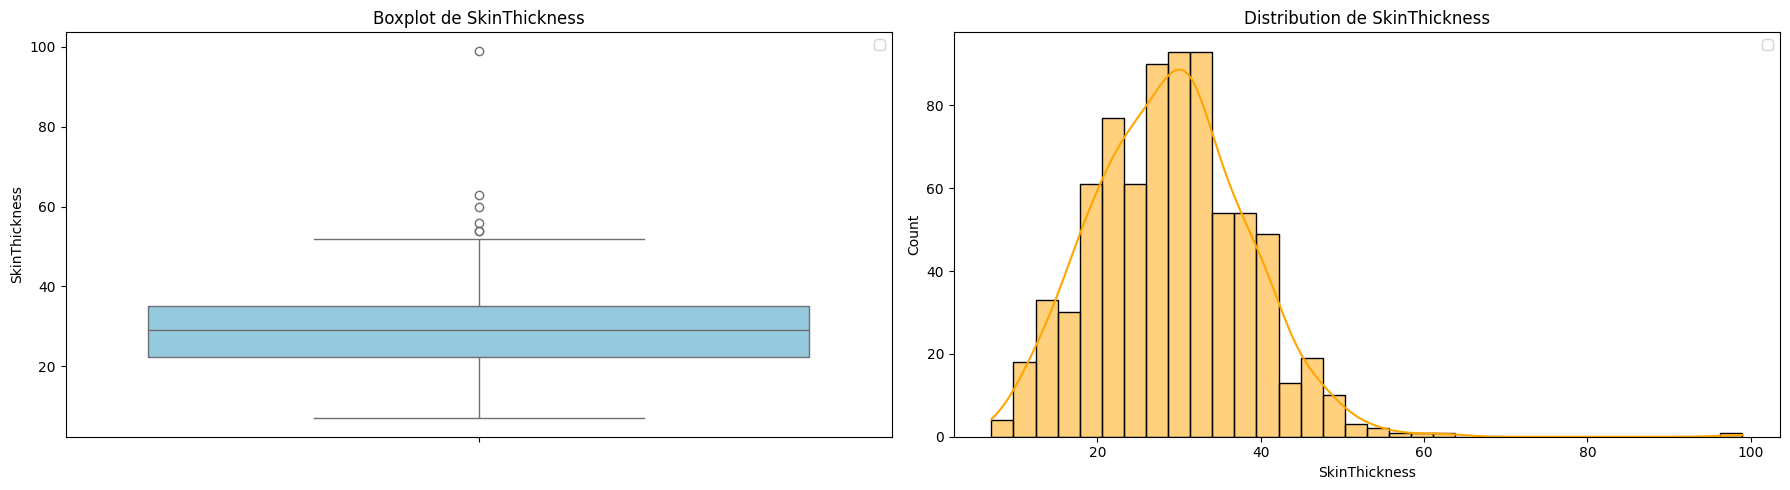

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


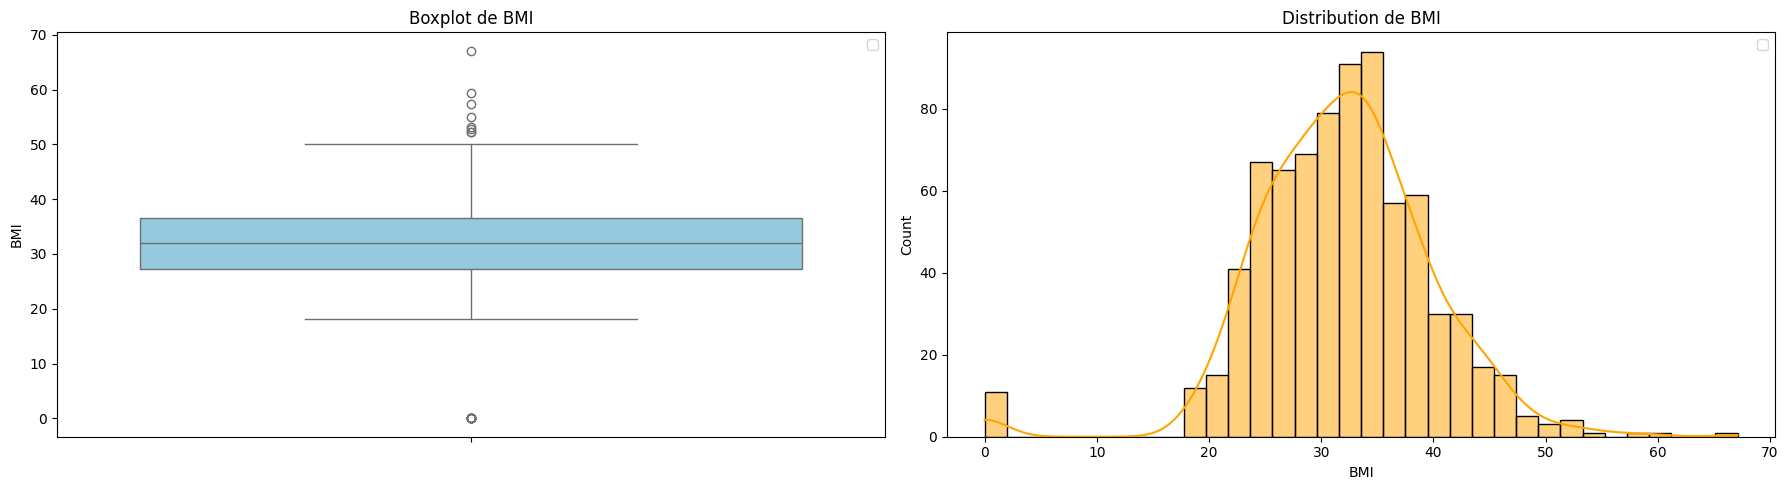

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


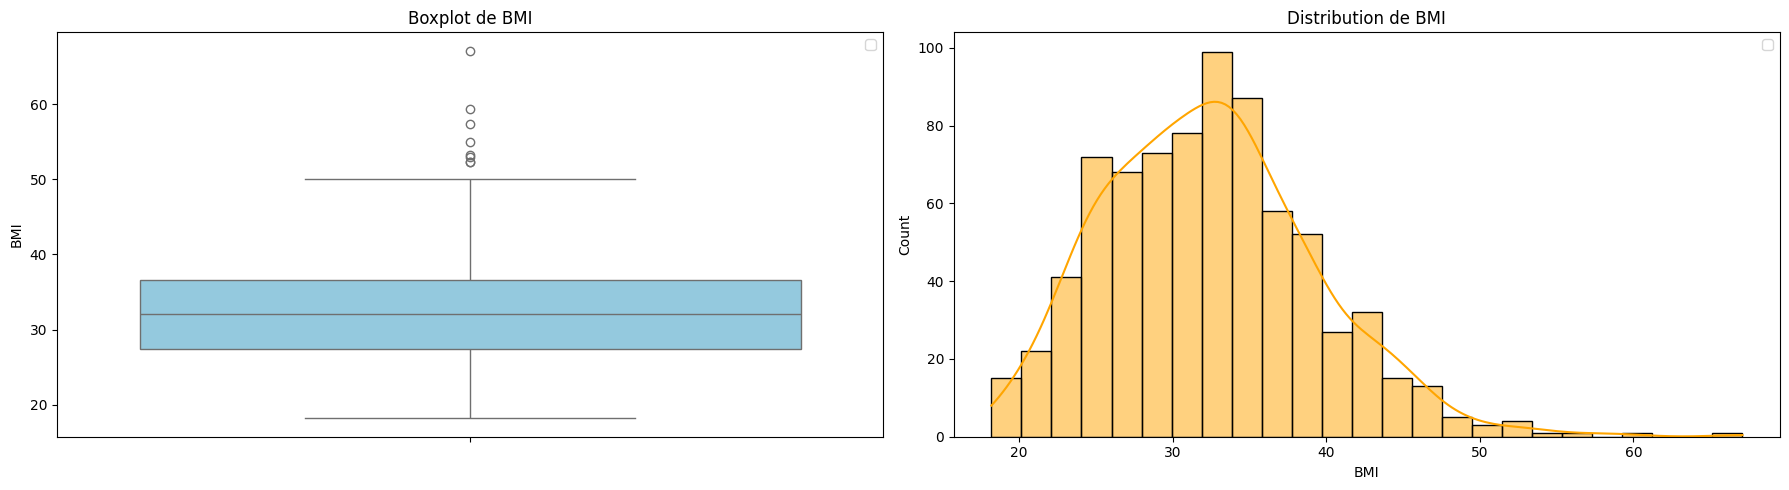

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


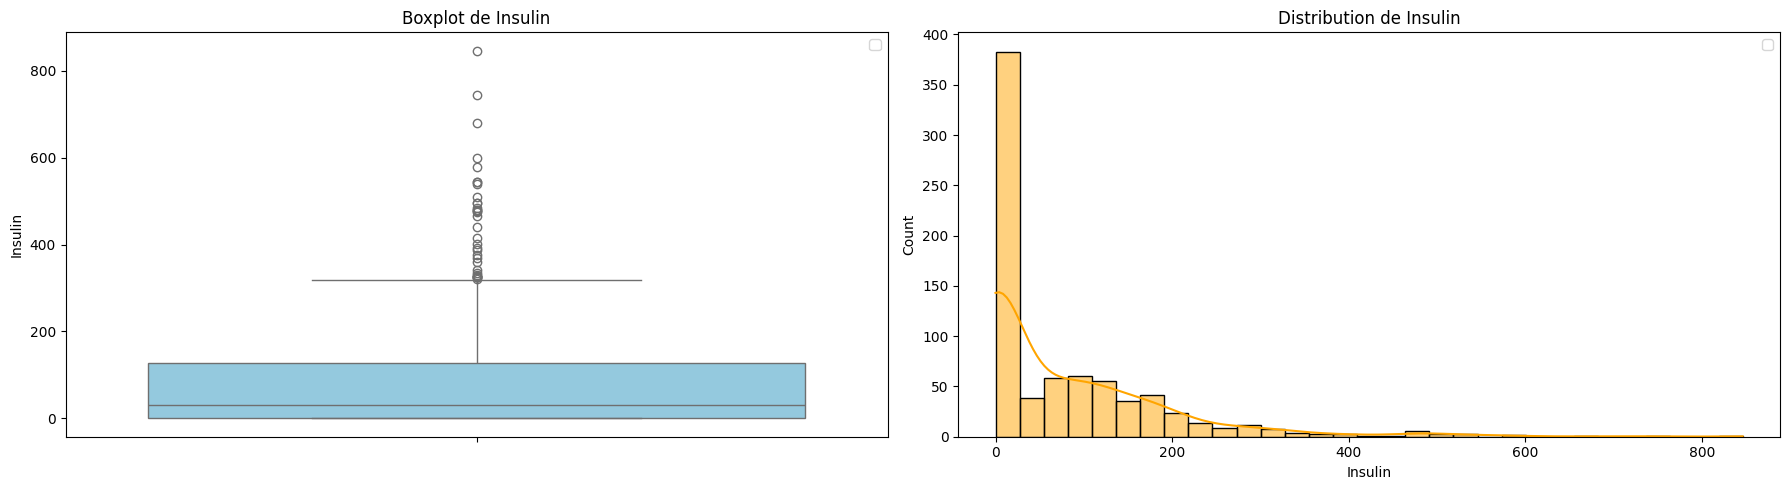

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


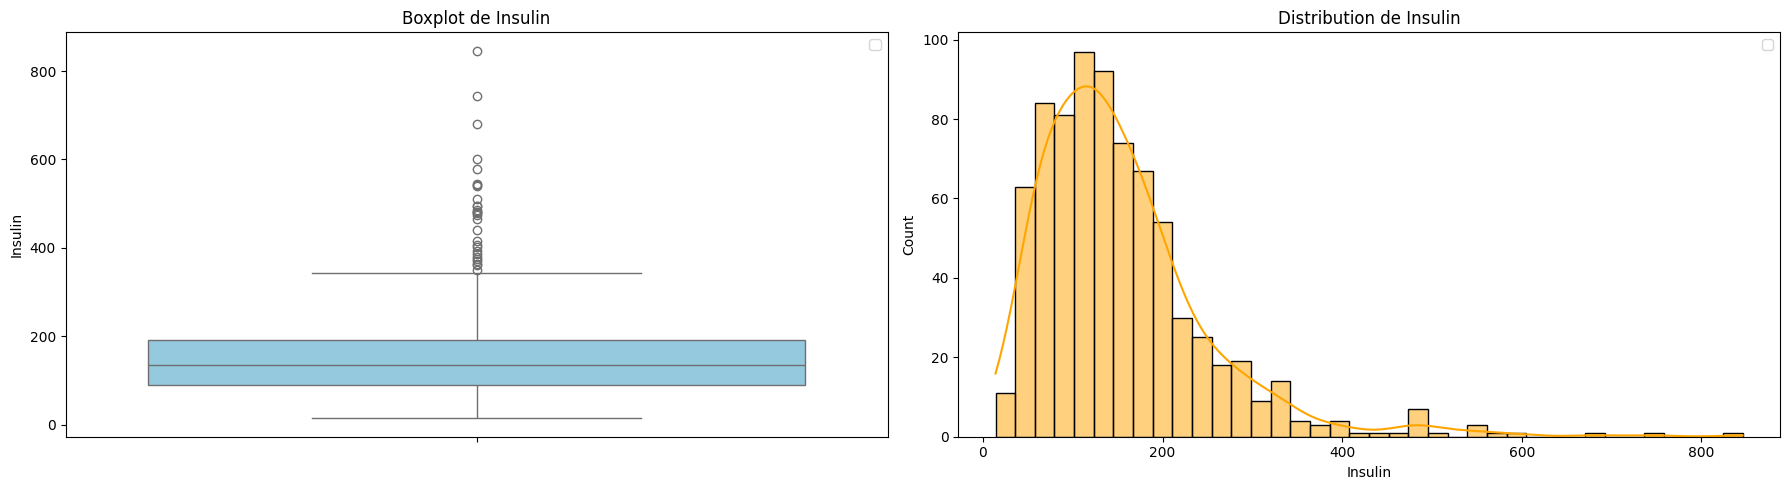

In [52]:
# Après l'application de knn sur les valeurs manquer
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
for col in columns:
    visualization(dataset, col)
    visualization(dataset_1, col)
